# Sentimetn analysis with Neural Network

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


,text,label
0,Tim Burton is in essence an expressionist film...,1
1,This tale based on two Edgar Allen Poe pieces ...,1
2,"Dead or Alive: Final, the movie that supposedl...",1
3,Certainly this film has the ring of truth abou...,1
4,It pains me to say this about an Australian fi...,0


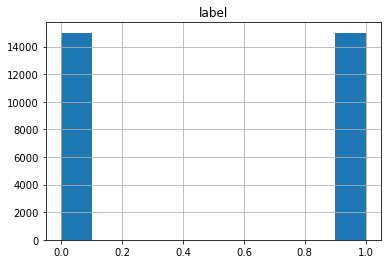

In [18]:
import pandas as pd

df_train = pd.read_json("../data/aclIMDB_train.json", orient='records')
df_train.info()
df_train.hist()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


,text,label
0,This movie features Charlie Spradling dancing ...,0
1,L'Hypothèse du tableau volé/The Hypothesis of ...,1
2,Surprisingly well made little movie. Short in ...,1
3,I rented this because I'm a bit weary of '80s ...,0
4,"Twenty years ago, the five years old boy Micha...",0


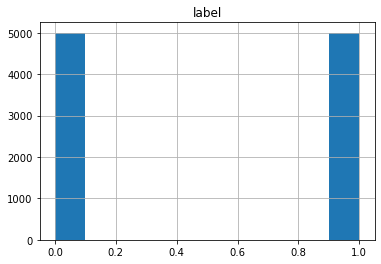

In [19]:
df_test = pd.read_json("../data/aclIMDB_test.json", orient='records')
df_test.info()
df_test.hist()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


,text,label
0,This was Barbra Streisand's first television s...,1
1,"I am, as many are, a fan of Tony Scott films. ...",0
2,A young scientist Harry Harrison is continuing...,0
3,"Anthony McGarten has adapted his play, Via Sat...",1
4,"I was watching this movie on Friday,Apr 7th. I...",1


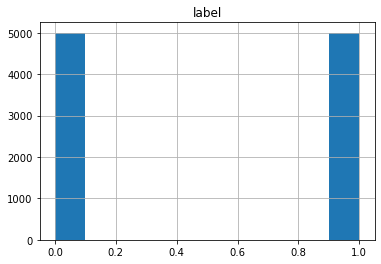

In [20]:
df_val = pd.read_json("../data/aclIMDB_val.json", orient="records")
df_val.info()
df_val.hist()
df_val.head()

In [21]:
train = [str(item).lower() for item in  df_train["text"].values]
val = [str(item).lower() for item in  df_val["text"].values]
test = [str(item).lower() for item in  df_test["text"].values]

In [22]:
import tensorflow as tf

VOCAB_SIZE = 10000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token="UNK")
tokenizer.fit_on_texts(train)

X_train = tokenizer.texts_to_sequences(train)
X_val = tokenizer.texts_to_sequences(val)
X_test = tokenizer.texts_to_sequences(test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 96002 unique tokens.


In [23]:
import numpy as np

def token_to_onehot(t):
    onehot = np.zeros((VOCAB_SIZE))

    for element in t:
        onehot[element] = 1
    return onehot
        

In [24]:
token_to_onehot([0, 1, 2, VOCAB_SIZE-1])

array([1., 1., 1., ..., 0., 0., 1.])

In [25]:
import numpy as np
# maxlen = 100

y_train = np.array(df_train["label"].values)
y_val = np.array(df_val["label"].values)
y_test = np.array(df_test["label"].values)

In [26]:
X_train = np.array([token_to_onehot(X_train[i]) for i in range(len(X_train))])
X_val = np.array([token_to_onehot(X_val[i]) for i in range(len(X_val))])
X_test = np.array([token_to_onehot(X_test[i]) for i in range(len(X_test))])

In [27]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(VOCAB_SIZE,)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# https://keras.io/api/optimizers/
# https://keras.io/api/optimizers/adam/
# https://keras.io/api/losses/
# https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# https://keras.io/api/metrics/accuracy_metrics/
# https://keras.io/api/metrics/
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss="binary_crossentropy",
              metrics=['binary_accuracy'])
              
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              epochs=10,
              batch_size=32)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='(training data)',color='blue')
plt.plot(h.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['binary_accuracy'], label='(training data)',color='blue')
plt.plot(h.history['val_binary_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

In [ ]:
df_test_raw = pd.read_json("../data/aclIMDB_test.json", orient="records")

In [ ]:
predictions = np.round(model.predict(X_test[:5]),0)
for i in range(len(predictions)):
    print(df_test_raw["text"].values[i][:100],"...")
    print("Pred: ", predictions[i][0], "Real: ", y_test[i])